# Image data augmentation
 
[ref.](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html) 

In [1]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

/Users/weitinglin/anaconda/envs/python3Env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1.2.1
2.0.6


In [2]:
import cv2  # for image processing
from skimage.measure import block_reduce

In [14]:
from sklearn.model_selection import train_test_split
import scipy.io
import os
import tarfile
import tqdm
# import keras_utils

In [87]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [112]:
# utils
def image_center_crop(img):
    """
    Makes a square center crop of an img.
    """
    h,w,_ = img.shape
    N = min(h,w) # new h and w
    padh = (h - N) // 2
    padw = (w - N) // 2
    cropped_img = img[ padh: padh + N, padw: padw + N , :]
    return cropped_img
def img_prep(img, image_size = 250):
    center_img = image_center_crop(img)
    small_img = cv2.resize(center_img, (image_size, image_size))
    return small_img
def read_all_img_raw(path, file_end = '.jpg'):
    '''
    read all images in a directory, and pre-process, packed into a list
    '''
    filenames = os.listdir(path) # list of file names
    imgs = [cv2.imread(path + f) for f in filenames if f.endswith(file_end)]
    return imgs   

In [74]:
# datapath = '/Users/weitinglin/Downloads/training'


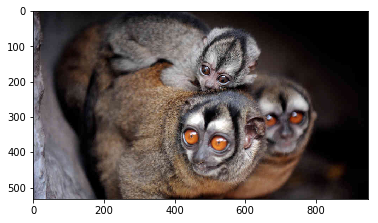

In [103]:
img = cv2.imread(datapath + '/n8/n8112.jpg')
# '/n2/n2116.jpg'

img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [88]:
datagen = ImageDataGenerator(
        rotation_range=50,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.25,
        horizontal_flip=True,
        fill_mode='nearest')


In [109]:
! rm -r aug_preview
! mkdir aug_preview

In [110]:
img = load_img(datapath + '/n8/n8112.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='aug_preview', save_prefix='monkey', save_format='jpg'):
    i += 1
    if i > 2:
        break  # otherwise the generator would loop indefinitely

## examples of augmented data

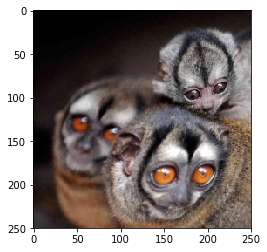

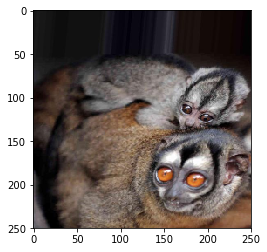

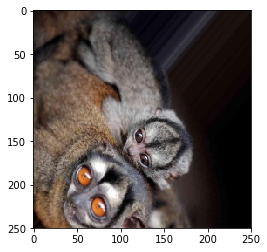

In [111]:
imgs = read_all_img_raw('aug_preview/', file_end = '.jpg')
for img in imgs:
    plt.imshow(cv2.cvtColor(img_prep(img), cv2.COLOR_BGR2RGB))
    plt.show()


In [113]:
! rm -r aug_preview

## Augment folders of image

In [130]:
NUMBER_AUG = 1 # number of augmented data

In [131]:
for i in range(10):
    path = datapath + '/n' + str(i) + '/'
    aug_path = datapath + '/n' + str(i) + '_aug'
    # make directory for augmentated images
    os.mkdir(aug_path)
    filenames = os.listdir(path) # list of file names
    for f in filenames: 
        if f.endswith('.jpg'):
            # for each original image
            this_img = load_img(path + f)  # this is a PIL image
            x = img_to_array(this_img)  # this is a Numpy array with shape (3, 150, 150)
            x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
            i = 0
            for batch in datagen.flow(x, batch_size=1,
                                      save_to_dir=aug_path, save_prefix= f[:-4], save_format='jpg'):
                i += 1
                if i > (NUMBER_AUG - 1):
                    break  # otherwise the generator would loop indefinitely